# More Exercises on Topics Covered in the Workshop and Beyond


<div align="right"><button><a href="https://colab.research.google.com/github/QuantEcon/workshop.africa-july2023/blob/main/day-09/exercise_set_9_with_solution.ipynb"><img src="" heght="10px"/><img
  src="https://colab.research.google.com/assets/colab-badge.svg"
  alt="open with Colab" width="100px"/></a></button></div>

#### Written for the QuantEcon Africa Workshop (July 2023)

## Exercise 1

Consider the stochastic second-order linear difference equation

$$
y_{t} = \alpha_{0} + \alpha_{1} y_{y-1} + \alpha_{2} y_{t-2} + u_{t}
$$

where $u_{t} \sim N \left(0, \sigma_{u}^{2}\right)$ and

$$
\left[\begin{array}{c}
y_{-1}\\
y_{0}
\end{array}\right]\sim N\left(\mu_{\tilde{y}},\Sigma_{\tilde{y}}\right)
$$

It can be written as a stacked system

$$
\underset{\equiv A}{\underbrace{\left[\begin{array}{cccccccc}
1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{1} & 1 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{2} & -\alpha_{1} & 1 & 0 & \cdots & 0 & 0 & 0\\
0 & -\alpha_{2} & -\alpha_{1} & 1 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & -\alpha_{2} & -\alpha_{1} & 1
\end{array}\right]}}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
y_{4}\\
\vdots\\
y_{T}
\end{array}\right]=\underset{\equiv b}{\underbrace{\left[\begin{array}{c}
\alpha_{0}+\alpha_{1}y_{0}+\alpha_{2}y_{-1}\\
\alpha_{0}+\alpha_{2}y_{0}\\
\alpha_{0}\\
\alpha_{0}\\
\vdots\\
\alpha_{0}
\end{array}\right]}}
$$



***Exercise 1.1*** Code the stacked system using the parameters below as $A$ and calculate the inverse of the system.

In [74]:
import numpy as np

In [75]:
# set parameters
T = 160

# coefficients of the second order difference equation
𝛼0 = 10
𝛼1 = 1.53
𝛼2 = -.9

# variance of u (\sigma_u^2)
σu = 10.

# distribution of y_{-1} and y_{0}
μy_tilde = np.array([1., 0.5])
Σy_tilde = np.array([[2., 1.], [1., 0.5]])

In [76]:
# construct A and A^{\prime}
A = np.zeros((T, T))

for i in range(T):
    A[i, i] = 1

    if i-1 >= 0:
        A[i, i-1] = -𝛼1

    if i-2 >= 0:
        A[i, i-2] = -𝛼2

A_inv = np.linalg.inv(A)

***Exercise 1.2*** We can compute $y$ by solving the system

$$
y = A^{-1} \left(b + u\right)
$$

Please solve for $\mu_{y}$ and $\Sigma_{y}$.


We have

$$
\begin{aligned}
\mu_{y} &= A^{-1} \mu_{b} \\
\Sigma_{y} &= A^{-1} E \left[\left(b - \mu_{b} + u \right) \left(b - \mu_{b} + u \right)^{\prime}\right] \left(A^{-1}\right)^{\prime} \\
           &= A^{-1} \left(\Sigma_{b} + \Sigma_{u} \right) \left(A^{-1}\right)^{\prime}
\end{aligned}
$$

where

$$
\mu_{b}=\left[\begin{array}{c}
\alpha_{0}+\alpha_{1}\mu_{y_{0}}+\alpha_{2}\mu_{y_{-1}}\\
\alpha_{0}+\alpha_{2}\mu_{y_{0}}\\
\alpha_{0}\\
\vdots\\
\alpha_{0}
\end{array}\right]
$$

$$
\Sigma_{b}=\left[\begin{array}{cc}
C\Sigma_{\tilde{y}}C^{\prime} & \boldsymbol{0}_{N-2\times N-2}\\
\boldsymbol{0}_{N-2\times2} & \boldsymbol{0}_{N-2\times N-2}
\end{array}\right],\quad C=\left[\begin{array}{cc}
\alpha_{2} & \alpha_{1}\\
0 & \alpha_{2}
\end{array}\right]
$$

$$
\Sigma_{u}=\left[\begin{array}{cccc}
\sigma_{u}^{2} & 0 & \cdots & 0\\
0 & \sigma_{u}^{2} & \cdots & 0\\
\vdots & \vdots & \vdots & \vdots\\
0 & 0 & \cdots & \sigma_{u}^{2}
\end{array}\right]
$$


In [77]:
# compute the mean vectors of b and y
μb = np.full(T, 𝛼0)
μb[0] += 𝛼1 * μy_tilde[1] + 𝛼2 * μy_tilde[0]
μb[1] += 𝛼2 * μy_tilde[1]

μy = A_inv @ μb

μy

array([ 9.        , 22.77      , 36.7381    , 45.716293  , 46.88163829,
       40.58424288, 29.90041715, 19.22181965, 12.49900862, 11.82384551,
       16.84137587, 25.12584412, 33.28530322, 38.31325422, 38.66250606,
       34.67170547, 28.25145391, 22.02018957, 18.26458152, 18.12663911,
       21.29563447, 26.26834554, 31.02449766, 33.82597043, 33.83168686,
       31.31910751, 27.46971632, 23.84146921, 21.7547032 , 21.82737361,
       23.81664874, 26.79483633, 29.56111571, 31.11315435, 30.99812201,
       29.42528776, 27.12238047, 25.01448313, 23.86201677, 23.99585084,
       25.23783669, 27.01762438, 28.62291228, 29.47719385, 29.33948553,
       28.3599384 , 26.98516878, 25.76336366, 25.13129451, 25.2638533 ,
       26.03553049, 27.09689368, 28.02626989, 28.49298862, 28.37062969,
       27.76337366, 26.94439499, 26.23788803, 25.8940132 , 26.00374097,
       26.4811118 , 27.11273418, 27.64948268, 27.90224774, 27.80590462,
       27.43101111, 26.94413284, 26.53661324, 26.35129871, 26.43

In [78]:
# compute the covariance matrices of b and y
Σu = np.eye(T) * σu ** 2

Σb = np.zeros((T, T))

C = np.array([[𝛼2, 𝛼1], [0, 𝛼2]])
Σb[:2, :2] = C @ Σy_tilde @ C.T

Σy = A_inv @ (Σb + Σu) @ A_inv.T

Σy

array([[ 1.00036450e+02,  1.53177269e+02,  1.44328416e+02, ...,
        -2.26815616e-02,  3.36053735e-03,  2.55550276e-02],
       [ 1.53177269e+02,  3.34952116e+02,  3.74617196e+02, ...,
        -7.71217970e-02, -1.75679000e-02,  4.25307303e-02],
       [ 1.44328416e+02,  3.74617196e+02,  5.43268735e+02, ...,
        -1.44222268e-01, -7.21238995e-02,  1.94504747e-02],
       ...,
       [-2.26815616e-02, -7.71217970e-02, -1.44222268e-01, ...,
         1.49712387e+03,  1.20557869e+03,  4.97123919e+02],
       [ 3.36053735e-03, -1.75679000e-02, -7.21238995e-02, ...,
         1.20557869e+03,  1.49712387e+03,  1.20557869e+03],
       [ 2.55550276e-02,  4.25307303e-02,  1.94504747e-02, ...,
         4.97123919e+02,  1.20557869e+03,  1.49712387e+03]])

## Exercise 2

[Inverse transform sampling](https://python.quantecon.org/prob_matrix.html#classic-trick-for-generating-random-numbers) is a classic method used to generate random numbers from a desired probability distribution. The basic idea behind inverse transform sampling is to transform uniform random numbers into random numbers that follow the desired distribution.


The core idea is that if we draw a random number $u$ from a uniform distribution on $[0, 1]$, then the random variable $F^{-1}(u)$ has the distribution $F$:

$$
X=F^{-1}(U)
$$

where X is a random variable with CDF $F$:

$$
F_X(x)=F(x)=\textrm{Prob}\{X\le x\}
$$

A general algorithm for inverse transform sampling is as follows:

1. Draw a random number $u$ from a uniform distribution on $[0, 1]$.

2. Compute $x=F^{-1}(u)$.

3. $x$ is a random number from the distribution $F$.

Implement the inverse transform sampling algorithm for the exponential distribution with parameter $\lambda$ = 0.5

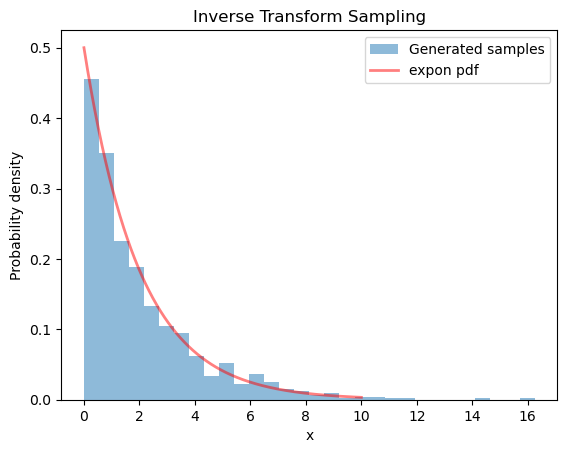

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

λ = 0.5

# Number of random samples to generate
num_samples = 1000

# Inverse transform sampling
def inverse_transform_sampling(num_samples, λ):
    u = np.random.uniform(0, 1, num_samples)  # Generate uniform random numbers
    x = -np.log(1 - u) / λ  # Apply inverse transform to get exponential random numbers
    return x

# Generate random samples
samples = inverse_transform_sampling(num_samples, λ)

# Plot the histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated samples')

x = np.linspace(0, 10, 1000)
plt.plot(x, expon.pdf(x, scale=1/λ),
       'r-', lw=2, alpha=0.5, label='expon pdf')

plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Inverse Transform Sampling')
plt.legend()
plt.show()


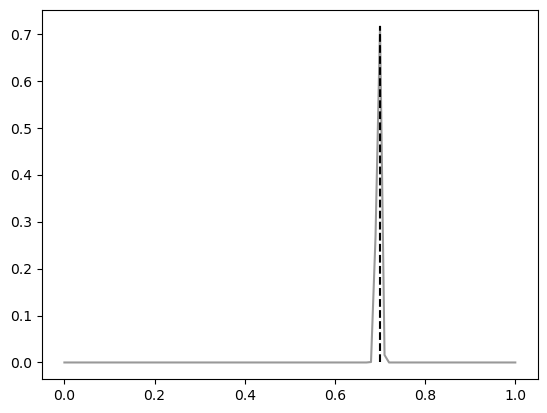

In [80]:
import numpy as np
import matplotlib.pyplot as plt


n = 10000 # Number of coin flips
bias = 0.7 # The true bias


xs = np.linspace(0, 1, 101) # The grid
prior = np.repeat(1/len(xs), len(xs)) # Uniform prior

def coin_flips(n, bias):
    # Simulate n coin flips with bias
    return np.random.choice([0, 1], size=n, p=[1-bias, bias])

flips = coin_flips(n, bias)

posterior_list = []
for flip in flips:
    likelihood = xs**flip * (1-xs)**(1-flip) # Bernoulli Likelihood
    updated_beliefs = likelihood * prior
    prior = likelihood * prior / np.sum(updated_beliefs)
    posterior_list.append(prior)
posterior = posterior_list[-1]

plt.plot(xs, posterior, color='black', alpha=0.4)
plt.vlines(bias, 0, np.max(posterior), color='black', linestyles='--')
plt.show()

Simulating 100 coin flips...
Simulating 200 coin flips...
Simulating 300 coin flips...
Simulating 400 coin flips...
Simulating 500 coin flips...
Simulating 600 coin flips...
Simulating 700 coin flips...
Simulating 800 coin flips...
Simulating 900 coin flips...
Simulating 1000 coin flips...
Simulating 1100 coin flips...
Simulating 1200 coin flips...
Simulating 1300 coin flips...
Simulating 1400 coin flips...
Simulating 1500 coin flips...
Simulating 1600 coin flips...
Simulating 1700 coin flips...
Simulating 1800 coin flips...
Simulating 1900 coin flips...
Simulating 2000 coin flips...
Simulating 2100 coin flips...
Simulating 2200 coin flips...
Simulating 2300 coin flips...
Simulating 2400 coin flips...
Simulating 2500 coin flips...
Simulating 2600 coin flips...
Simulating 2700 coin flips...
Simulating 2800 coin flips...
Simulating 2900 coin flips...
Simulating 3000 coin flips...
Simulating 3100 coin flips...
Simulating 3200 coin flips...
Simulating 3300 coin flips...
Simulating 3400 coi

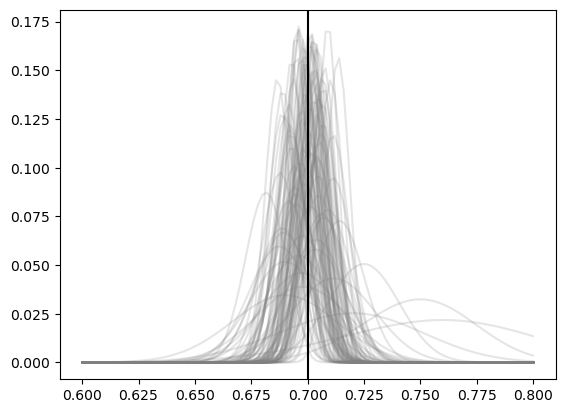

In [88]:
import numpy as np
import matplotlib.pyplot as plt


n = 10_000 # Number of coin flips
bias = 0.7 # The true bias

def simulate(n, bias):
    xs = np.linspace(0.6, 0.8, 101) # The grid
    prior = np.repeat(1/len(xs), len(xs)) # Uniform prior

    def coin_flips(n, bias):
        # Simulate n coin flips with bias
        return np.random.choice([0, 1], size=n, p=[1-bias, bias])

    flips = coin_flips(n, bias)

    posterior_list = []
    for flip in flips:
        likelihood = xs**flip * (1-xs)**(1-flip) # Bernoulli Likelihood
        updated_beliefs = likelihood * prior
        prior = likelihood * prior / np.sum(updated_beliefs)
        posterior_list.append(prior)

    posterior = posterior_list[-1]
    plt.plot(xs, posterior, color='grey', alpha=0.2)

for i in range(100, n+1, 100):
    print(f"Simulating {i} coin flips...")
    simulate(i, bias)

plt.axvline(bias, color='black')
plt.show()
